<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-CNN/blob/main/Tugas_ML_CNN_AdhitDanielRian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Convolutional Neural Network

Alexius Adhitya K            - 18/424179/PA/18284\
Daniel Suranta Sitepu       - 18/424185/PA/18290\
Fransiskus Rian Wardana P   - 18/427592/PA/18552

###Import Libraries

In [1]:
from google.colab import drive
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from PIL import Image
from random import shuffle
from shutil import copy
from tensorflow.keras.optimizers import SGD

import keras_preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import tensorflow as tf
import zipfile

###Download Dataset

In [2]:
!pip install --upgrade gdown
!gdown --id 1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD -O flowers.zip
!ls -lh

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=6c31481ca7f33d5b0b3f763c5653b00f76f1a944ee5b18e5593698d95d2a863c
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Downloading...
From: https://drive.google.com/uc?id=1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD
To: /content/flowers.zip
472MB [00:12, 37.4MB/s]
total 450M
-rw-r--r-- 1 root root 450M Jun  8 16:13 flowers.zip
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data


###Load and Process Images

In [3]:
FILE_PATH = '/content/flowers.zip'
EXTRACTED_PATH = '/tmp/flowers/'
PROCESSED_PATH = '/tmp/processed/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# View folder structure
!apt install tree -y
!tree -d -L 2 /tmp/flowers/

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData(grayscale=True):
   for folder in USED_CLASSES:
       img_files = os.listdir(EXTRACTED_PATH + folder)
       number = 0
       for item in img_files:
           if item.endswith(".jpg") and number < 100:
               os.makedirs(os.path.dirname(PROCESSED_PATH + folder + '/'), exist_ok=True)
               img = Image.open(EXTRACTED_PATH + folder + '/' + item)
               new_img = img.resize((320, 240))
               if grayscale:
                 new_img = new_img.convert('L')
               new_img.save(PROCESSED_PATH + folder + '/' + item)
               if folder == 'rose':
                   ROSE_DATA.append((item, folder))
               if folder == 'sunflower':
                   SUNFLOWER_DATA.append((item, folder))
               if folder == 'dandelion':
                   DANDELION_DATA.append((item, folder))
               number+=1
# def loadData(grayscale=True):
#     for folder in USED_CLASSES:
#         img_files = os.listdir(EXTRACTED_PATH + folder)
#         number = 0
#         for item in img_files:
#             if item.endswith(".jpg") and number < 100:
#                 os.makedirs(os.path.dirname(PROCESSED_PATH + folder + '/'), exist_ok=True)
#                 img = tf.io.decode_jpeg(tf.io.read_file(EXTRACTED_PATH + folder + '/' + item), channels=3)
#                 if grayscale:
#                   new_img = tf.image.rgb_to_grayscale(img)
#                 new_img=tf.io.encode_jpeg(new_img)
#                 written_img=tf.io.write_file(tf.constant(PROCESSED_PATH + folder + '/' + item), new_img)
#                 if folder == 'rose':
#                     ROSE_DATA.append((item, folder))
#                 if folder == 'sunflower':
#                     SUNFLOWER_DATA.append((item, folder))
#                 if folder == 'dandelion':
#                     DANDELION_DATA.append((item, folder))
#                 number+=1
loadData()

shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (91.5 kB/s)
Selecting previously unselected package tree.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/tmp/flowers/
├── daisy
├── dandelion
├── flowers
│   ├── daisy
│   ├── dandelion
│   ├── rose
│   ├── sunflower
│   └── tulip
├── rose
├── sunflower
└── tulip

11 directories


###View Processed Images

In [4]:
def displayImages(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []

  if final:
      folder = FINAL_PATH
  else:
      folder = PROCESSED_PATH
  
  subdirs = os.listdir(folder)
  print(subdirs)

  for subdir in subdirs:
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
  
  #images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # if final:
    #     plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # else:
    #     plt.imshow(image)

['sunflower', 'rose', 'dandelion']
5
['sunflower', 'rose', 'dandelion']
5


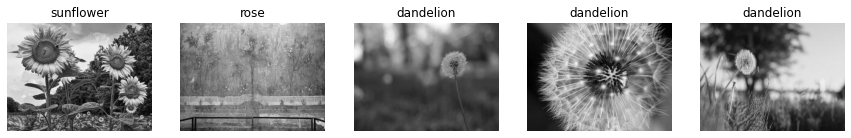

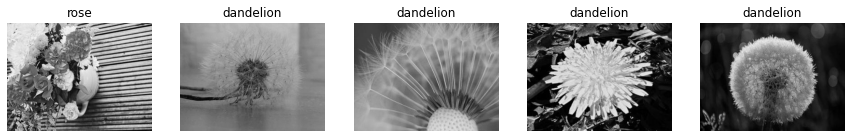

In [5]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

### Collect Train and Test Images into Folders

In [6]:
train_rose_dir = '/tmp/final/train/rose/'
os.makedirs(os.path.dirname(train_rose_dir), exist_ok=True)
train_sunflower_dir = '/tmp/final/train/sunflower/'
os.makedirs(os.path.dirname(train_sunflower_dir), exist_ok=True)
train_dandelion_dir = '/tmp/final/train/dandelion/'
os.makedirs(os.path.dirname(train_dandelion_dir), exist_ok=True)

test_rose_dir = '/tmp/final/test/rose/'
os.makedirs(os.path.dirname(test_rose_dir), exist_ok=True)
test_sunflower_dir = '/tmp/final/test/sunflower/'
os.makedirs(os.path.dirname(test_sunflower_dir), exist_ok=True)
test_dandelion_dir = '/tmp/final/test/dandelion/'
os.makedirs(os.path.dirname(test_dandelion_dir), exist_ok=True)

for item, folder in TRAIN_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_dandelion_dir, item)
        copy(old_path, new_path)

for item, folder in TEST_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_dandelion_dir, item)
        copy(old_path, new_path)

###Augmenting & Generate Data

In [7]:
TRAINING_DIR = "/tmp/final/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

VALIDATION_DIR = "/tmp/final/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = np.expand_dims(train_generator, axis=3)
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(240, 320),
	class_mode='categorical',
    color_mode='grayscale',
    batch_size=60
)

# validation_generator = np.expand_dims(validation_generator, axis=3)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(240, 320),
	class_mode='categorical',
    color_mode='grayscale',
    batch_size=20
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


###Build the CNN Model

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 240x320 with 1 byte color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 320, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The third convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 78, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 289536)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               148242944 
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

###Train the CNN Model (Learning Rate 0.1)

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=50,
                    # steps_per_epoch=4,
                    validation_data = validation_generator,
                    verbose = 1,
                    # validation_steps=2,
                    )

# model.save("rps.h5")

Epoch 1/50
4/4 [==============================] - 34s 438ms/step - loss: 1.4027 - accuracy: 0.3375 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 2s 373ms/step - loss: 1.1258 - accuracy: 0.2833 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 2s 380ms/step - loss: 1.0992 - accuracy: 0.3042 - val_loss: 1.0983 - val_accuracy: 0.3167
Epoch 4/50
4/4 [==============================] - 2s 375ms/step - loss: 1.0992 - accuracy: 0.3125 - val_loss: 1.0975 - val_accuracy: 0.4167
Epoch 5/50
4/4 [==============================] - 2s 376ms/step - loss: 1.0974 - accuracy: 0.4375 - val_loss: 1.0965 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 2s 373ms/step - loss: 1.0961 - accuracy: 0.3333 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 2s 373ms/step - loss: 1.0955 - accuracy: 0.3583 - val_loss: 1.0961 - val_accuracy: 0.4667
Epoch 8/50
4/4 [===

### CNN Model with Learning Rate 0.1 Accuracy Graph

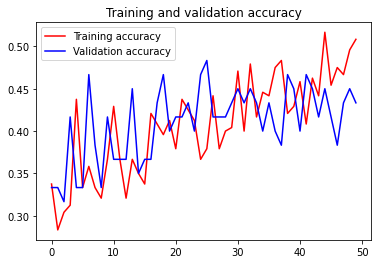

<Figure size 432x288 with 0 Axes>

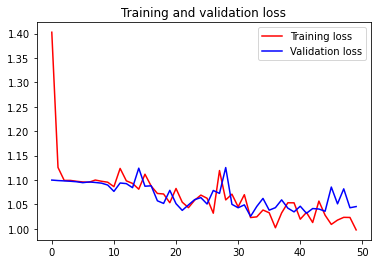

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

###Train the CNN Model (Learning Rate 0.8)

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(learning_rate=0.8), metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=50,
                    # steps_per_epoch=4,
                    validation_data = validation_generator,
                    verbose = 1,
                    # validation_steps=2,
                    )

# model.save("rps.h5")

Epoch 1/50
4/4 [==============================] - 2s 419ms/step - loss: 3.9487 - accuracy: 0.3458 - val_loss: 1.1143 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 2s 381ms/step - loss: 1.1112 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 2s 378ms/step - loss: 1.1013 - accuracy: 0.3083 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 2s 379ms/step - loss: 1.1035 - accuracy: 0.3125 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 2s 372ms/step - loss: 1.1018 - accuracy: 0.3292 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 2s 378ms/step - loss: 1.1040 - accuracy: 0.3167 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 2s 377ms/step - loss: 1.1024 - accuracy: 0.3458 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 8/50
4/4 [====

### CNN Model with Learning Rate 0.8 Accuracy Graph

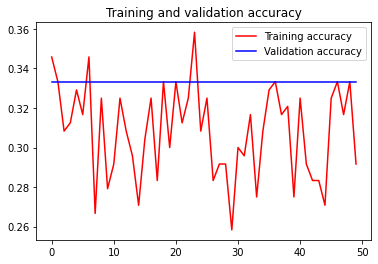

<Figure size 432x288 with 0 Axes>

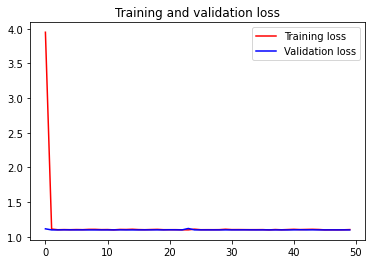

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()